## Unsupervised Learning

## K-Means Clustering

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)

X[50:100, :] = X1

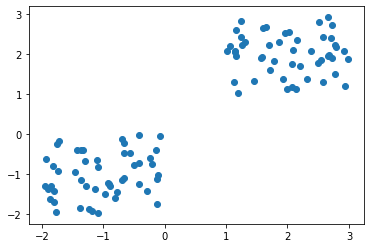

In [6]:
plt.scatter(X[ :, 0], X[ :, 1])
plt.show()

In [13]:
wcss = []

for i in range(1,10):
    kmeans =  KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,  random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

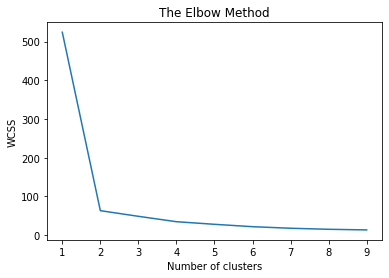

In [14]:
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [20]:
Kmean.cluster_centers_

array([[-1.03836881, -1.02551723],
       [ 2.00809237,  1.99942104]])

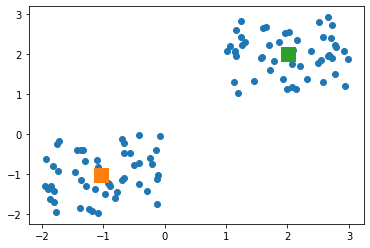

In [21]:
plt.scatter(X[ :, 0], X[ :, 1])
plt.scatter(-1.03836881, -1.02551723, s=200, marker='s')
plt.scatter(2.00809237,  1.99942104, s=200, marker='s')
plt.show()

In [22]:
from sklearn.datasets import make_blobs

In [24]:
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

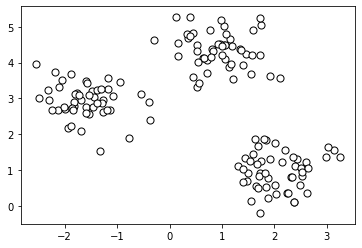

In [25]:
plt.scatter(
    X[ :, 0], X[ :, 1],
    c='white', marker='o',
    edgecolors='black', s=50  
)
plt.show()

In [31]:
km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)

In [32]:
#Ambil cluster center

km.cluster_centers_

array([[ 0.9329651 ,  4.35420712],
       [ 2.06521743,  0.96137409],
       [-1.5947298 ,  2.92236966]])

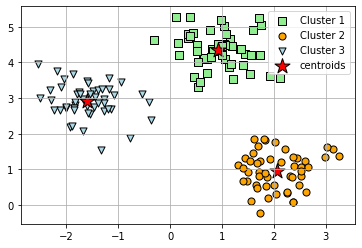

In [37]:
plt.scatter(
    X[y_km == 0,0], X[y_km == 0,1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='Cluster 1'
)

plt.scatter(
    X[y_km == 1,0], X[y_km == 1,1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='Cluster 2'
)

plt.scatter(
    X[y_km == 2,0], X[y_km == 2,1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='Cluster 3'
)

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend()
plt.grid()
plt.show()

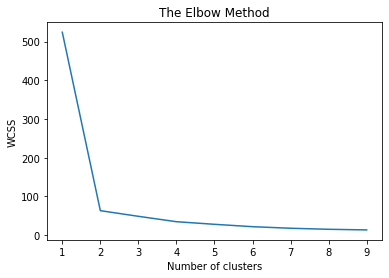

In [38]:
plt.plot(range(1, 10), wcss)
plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## PCA

In [39]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()


In [40]:
breast_data = breast.data

In [41]:
breast_data.shape

(569, 30)

In [42]:
breast_label = breast.target

In [43]:
breast_label.shape

(569,)

In [44]:
breast_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [46]:
labels =  np.reshape(breast_label, (569,1))

In [48]:
final_breast_data = np.concatenate([breast_data, labels], axis=1)
final_breast_data.shape

(569, 31)

In [49]:
import pandas as pd

In [50]:
breast_dataset = pd.DataFrame(final_breast_data)

In [51]:
breast_dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [52]:
features = breast.feature_names

In [53]:
print(features)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [54]:
features_labels = np.append(features, 'label')

In [56]:
print(features_labels)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'label']


In [57]:
breast_dataset.columns = features_labels

In [84]:
breast_dataset['label'].replace(0, 'Benign', inplace=True)
breast_dataset['label'].replace(1, 'Malignant', inplace=True)

In [85]:
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Benign


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x)


In [61]:
x.shape

(569, 30)

In [62]:
np.std(x)

1.0

In [65]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

In [66]:
print(feat_cols)

['feature0', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29']


In [67]:
normalised_breast = pd.DataFrame(x, columns=feat_cols)
normalised_breast.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [89]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principal_breast = pca_breast.fit_transform(x)

In [90]:
principal_breast_df = pd.DataFrame(data=principal_breast, columns=['PC 1', 'PC 2'])

In [91]:
principal_breast_df.head()

,PC 1,PC 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [92]:
print('Variance Ratio: {}'.format(pca_breast.explained_variance_ratio_))

Variance Ratio: [0.44272026 0.18971182]


In [93]:
100-(44.2+18.9)

36.9

<Figure size 432x288 with 0 Axes>

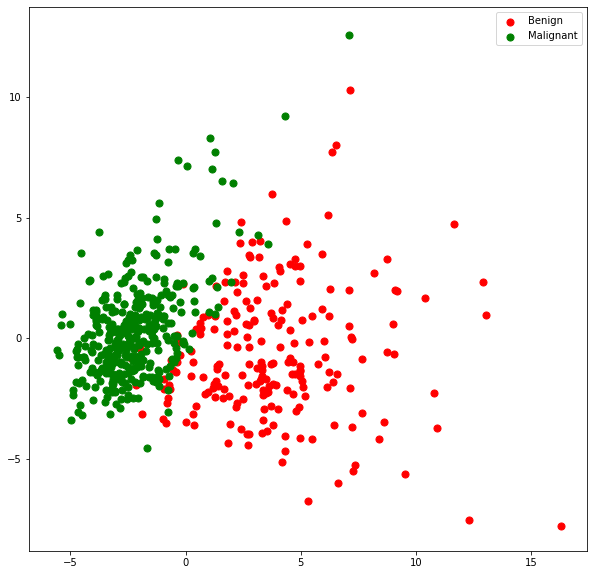

In [94]:
plt.figure()
plt.figure(figsize=(10,10))

targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_df.loc[indicesToKeep, 'PC 1'],
               principal_breast_df.loc[indicesToKeep, 'PC 2'], c = color, s = 50)

plt.legend(targets)
plt.show()

In [98]:
# Assigning features and label variables
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)

# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)

#Combinig weather and temp into single listof tuples
features=list(zip(weather_encoded,temp_encoded))

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)


GaussianNB(priors=None, var_smoothing=1e-09)

In [99]:
import pickle

#save model
filename='final_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [100]:
loaded_model = pickle.load(open(filename, 'rb'))

In [101]:
loaded_model.predict([[0,2]])

array([1], dtype=int64)